<a href="https://colab.research.google.com/github/ericasrafael/modelo_previsao_aluguel/blob/main/modelo_previsao_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Descrição do dados
No conjunto de dados, encontraremos as seguintes variáveis:

* CRIM: Taxa de criminalidade per capita no bairro
* ZN: Proporção de terrenos residenciais com lotes com mais de 25.000 m2 no bairro
* INDUS: Proporção de acres comerciais não comerciais na cidade
* CHAS: Variável fictícia Charles River (1 se o terreno é limitado por rio; 0 caso contrário)
* NOX: Concentração de óxido nítrico (partes por 10 milhões) na cidade
* RM: Número médio de quartos por moradia no bairro
* AGE: Proporção de unidades ocupadas em propriedades construídas antes de 1940
* DIS: Distâncias ponderadas para cinco centros de emprego em Boston
* RAD: Índice de acessibilidade às rodovias
* TAX: Taxa de imposto sobre a propriedade de valor total (x10.000)
* PTRATIO: Proporcaoo de alunos por professor no bairro
* LSTAT: Porcentagem da população considerada classe baixa no bairro
* MEDV: Valor médio das casas ocupadas pelos proprietários (x1000)

In [184]:
# importando bibliotecas 

import pandas as pd  # DataFrame
import numpy as np   # arrays
import seaborn as sns  # visualização
import matplotlib.pyplot as plt   # visualização
from sklearn.model_selection import train_test_split    # treino e teste de modelagem
from sklearn.linear_model import LinearRegression  # modelo regressão linear
from sklearn.metrics import r2_score   # métrica de verificação de performance de modelo

In [185]:
# importando arquivo csv

df = pd.read_csv('https://raw.githubusercontent.com/awarischool/br-regression-project/master/houses.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [186]:
# Confirme que o dataframe possui 506 amostras e 13 variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [187]:
df.shape

(506, 13)

13 colunas e
506 registros


In [188]:
linhas = df.shape[0]
colunas = df.shape[1]

print(f'O DataFrame em análise tem {linhas} linhas e {colunas} colunas.')

O DataFrame em análise tem 506 linhas e 13 colunas.


In [189]:
# Verifique se existem valores missing em alguma variável.

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [190]:
df[ df.isnull() ].count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

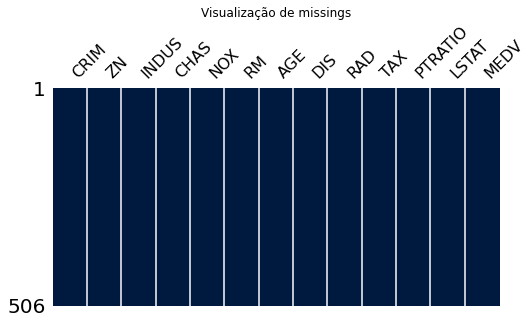

In [191]:
import missingno as missing
missing.matrix(df, figsize=(8,4), color=(0, 0.1, 0.25), sparkline=False)
plt.title('Visualização de missings')
plt.show()

In [192]:
# Gere estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


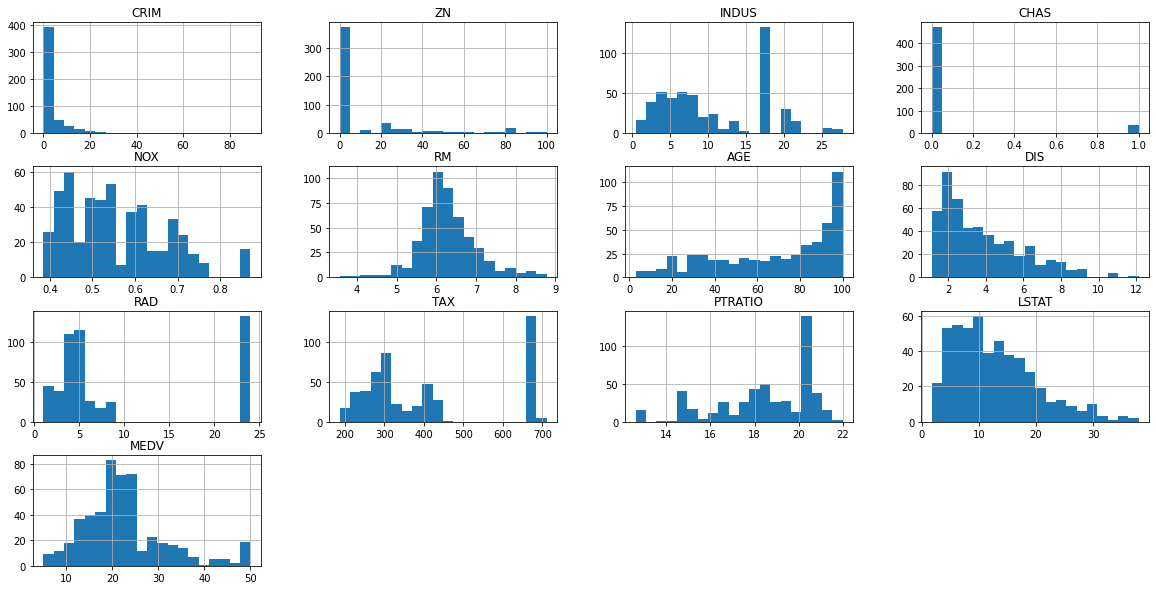

In [193]:
# distribuições das features e target

df.hist(figsize=(20,10), bins=20)
plt.show()

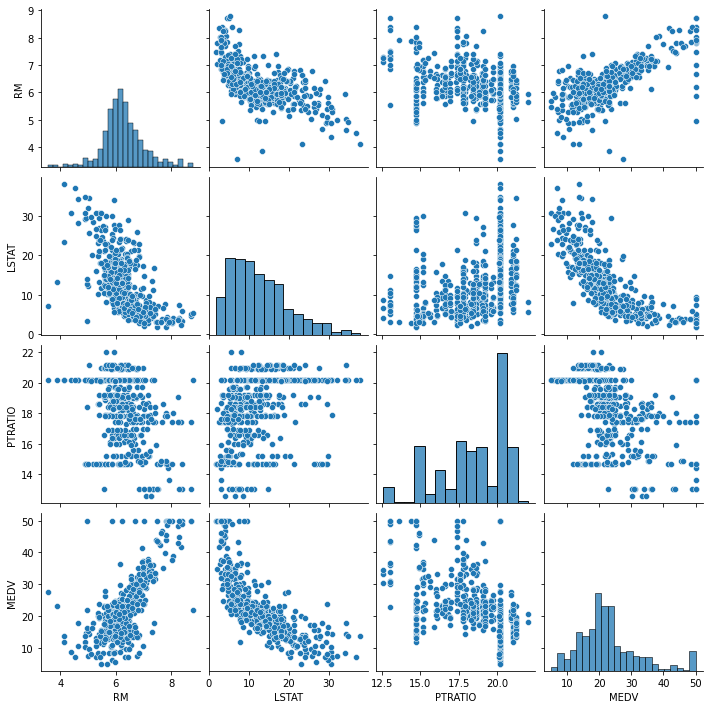

In [194]:
# Plote a relação das variáveis 'RM', 'LSTAT', 'PTRATIO' com a variável alvo.
variaveis = df[['RM','LSTAT','PTRATIO','MEDV']]
sns.pairplot(variaveis)
plt.show()

Pode-se analisar que o valor médio das moradias tem uma correlação positiva com o aumento do números de quartos. <br>
O que parece não ocorrer com a variável LSTAT, que decresce com o aumento da target, indicando que quanto maior a quantidade de pessoas consideradas classe baixa no bairro, menor é o valor dos imóveis.


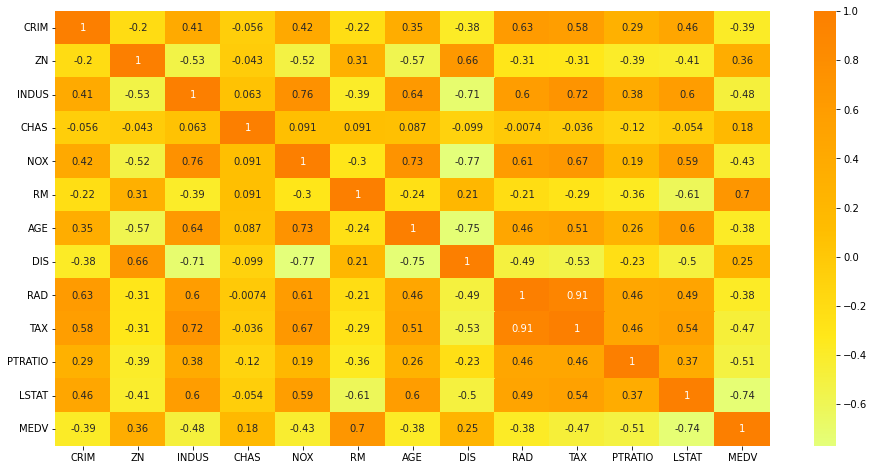

In [206]:
# todas as correlações

plt.figure(figsize = (16, 8)) 
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show()

In [197]:
# Plote a relação das variáveis de outras variáveis com a variável alvo.

correlacao = df.corr()
correlacao.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321


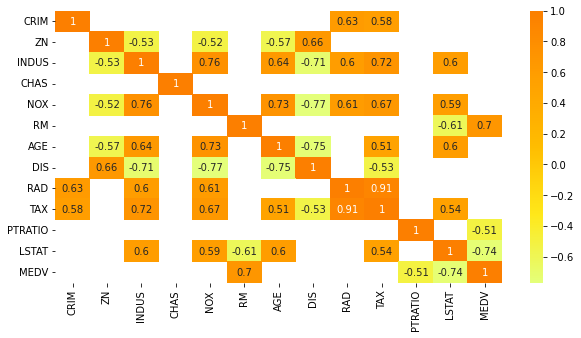

In [205]:
# analisando as correlações superiores à 0.5

fortes = correlacao[(correlacao > 0.5) | (correlacao < -0.5)]
plt.figure(figsize = (10, 5))
sns.heatmap(fortes, cmap='Wistia', annot=True)
plt.show()

Variáveis que possuem forte correlação, tanto positiva, quanto negativa,  com a variável alvo, podem ter peso significativo na performace do modelo.
* maiores correlações:
* LSTAT, PTRATIO e RM

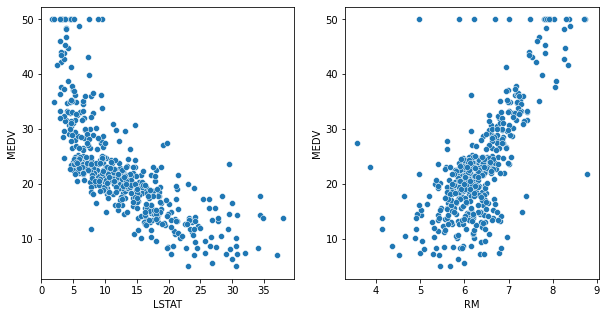

In [207]:
# Plote um gráfico de dispersão de LSTAT e RM com MEDV.
# Utilize subplots, matplotlib e seaborn

fig, axes= plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0], x='LSTAT',y='MEDV',data=df)
sns.scatterplot(ax=axes[1], x='RM',y='MEDV',data=df)
plt.show()

Com subplot, é possível organizar plotagens em uma grade regular.<br>
plt.subplot( número de linhas , númuero de colunas , número da plotagem )

Confirmando:

* Os preços aumentam à medida que o valor de RM aumenta linearmente. Existem poucos valores discrepantes e os dados parecem estar limitados a 50.
* Os preços tendem a diminuir com o aumento do LSTAT. Embora não pareça seguir exatamente uma linha linear.

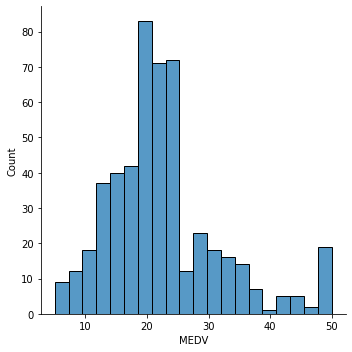

In [208]:
# Plote a distribuição da variável alvo.

# preliminarmente: contagem
sns.displot(df['MEDV'], bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



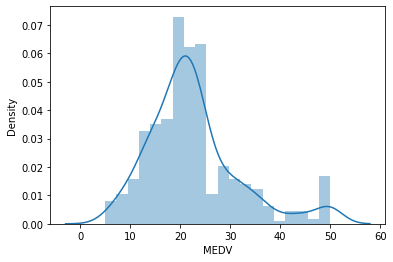

In [209]:
# densidade
sns.distplot(df['MEDV'], bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



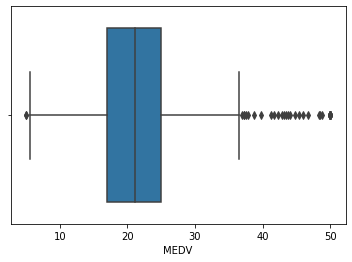

In [210]:
sns.boxplot(df['MEDV'], data=df)

In [211]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [213]:
X = df[['LSTAT','RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [214]:
# Usando o algoritmo de Regressão Linear para treinar um modelo

modelo = LinearRegression()

# treino

modelo.fit(X_train, y_train)


LinearRegression()

In [220]:
# Utilize os dados de treino para prever a variável alvo.

resultado_treino = modelo.predict(X_train)
resultados_treino = list(resultado_treino)
resultados_treino

[26.663737589439215,
 25.86252897700183,
 6.132278149450915,
 22.64441175289892,
 16.439054845464668,
 27.23577957536606,
 21.75179373112803,
 28.21527407838299,
 34.31610284840042,
 25.655298355743202,
 16.414944971606253,
 31.906845066066463,
 30.64166823492842,
 33.18192308801858,
 23.237486978535852,
 19.55072166320836,
 33.06970587483219,
 35.247992521684985,
 22.554786730044665,
 20.69594893974992,
 30.03118691146928,
 21.510932465350855,
 26.021730060620605,
 21.29521265946374,
 24.646817854951415,
 24.285391094480275,
 18.099318266057082,
 29.539322649954798,
 19.426684010923267,
 24.63068690296468,
 26.590651124645575,
 8.420636303235252,
 27.77664961228046,
 30.76839303923459,
 9.334827011937715,
 17.084851563896464,
 32.75414384536771,
 22.7742635204225,
 25.76439162636995,
 18.241790581538268,
 16.680153629730132,
 27.717276671063217,
 31.43978813058639,
 24.17817882570014,
 26.913814676485558,
 15.684402374894406,
 28.1796889597996,
 17.72881960809547,
 28.864847903796885,

In [217]:
modelo.score(X_train, y_train)

0.6251836356449056

In [221]:
y_pred = modelo.predict(X_test)
r2_score(y_test,y_pred)

0.6753556251471677